In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos de phishing y no phishing
phishing_df = pd.read_excel('FISHING.xlsx')
non_phishing_df = pd.read_excel('NOFISHING.xlsx')

# Agregar una columna de etiqueta en ambos DataFrames
phishing_df['label'] = 1  # 1 indica phishing
non_phishing_df['label'] = 0  # 0 indica no phishing

# Combinar ambos DataFrames en uno solo
data = pd.concat([phishing_df, non_phishing_df], ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
data.to_csv('combined_phishing_data.csv', index=False)  # 'index=False' evita que se guarde el índice

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Usando TfidfVectorizer para convertir texto en características
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['url'])  # Asumiendo que la columna de texto se llama 'message'
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9944699499165276
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7068
           1       1.00      0.99      1.00     12100

    accuracy                           0.99     19168
   macro avg       0.99      0.99      0.99     19168
weighted avg       0.99      0.99      0.99     19168



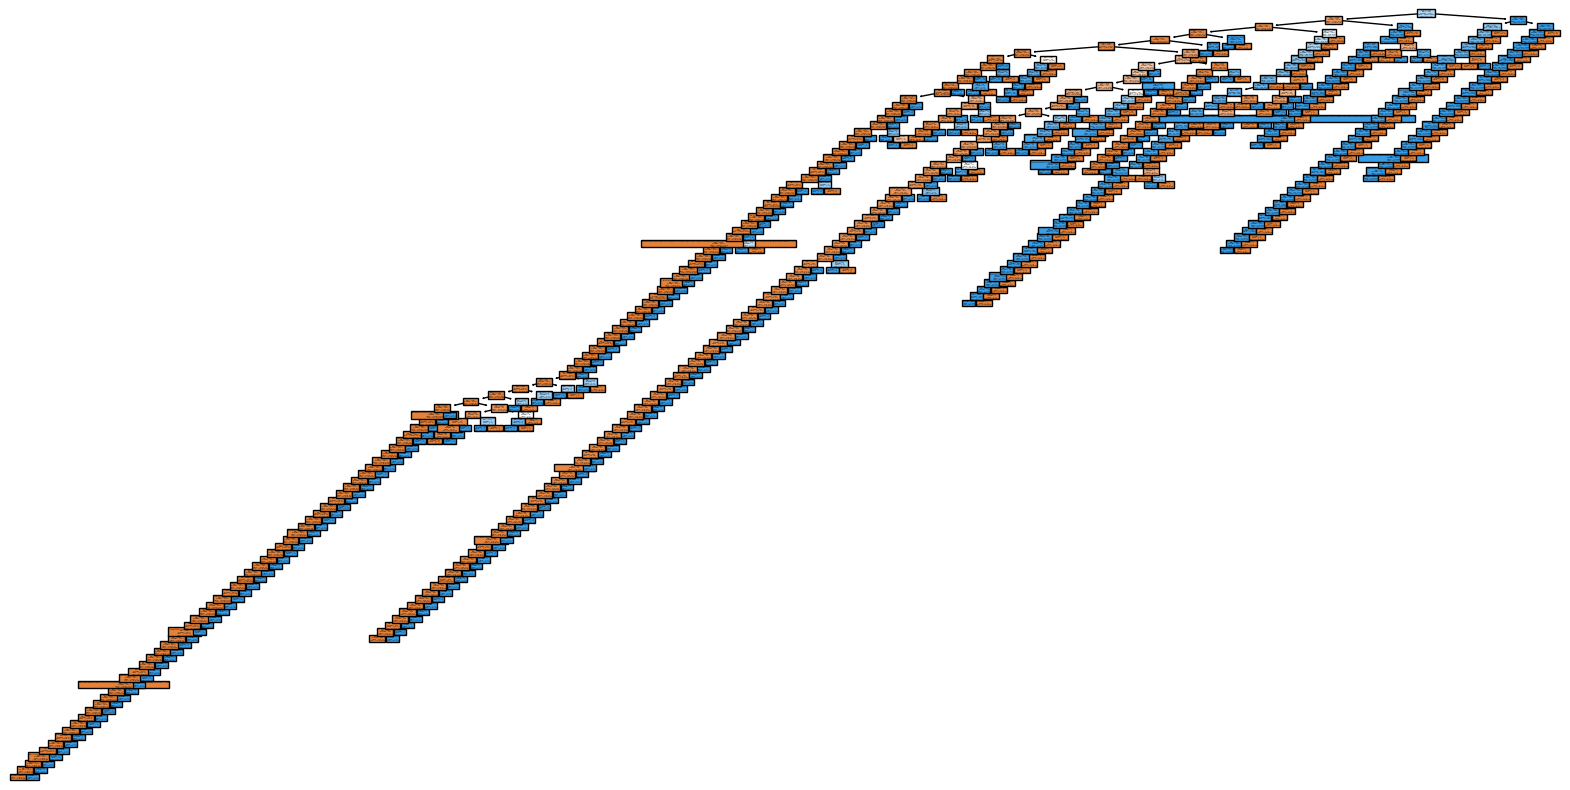

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['Non-Phishing', 'Phishing'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)

# Calcular el porcentaje de precisión
accuracy_percentage = accuracy * 100

print("Accuracy (decimal):", accuracy)
print("Accuracy (percentage):", accuracy_percentage, "%")

Accuracy (decimal): 0.9944699499165276
Accuracy (percentage): 99.44699499165276 %


RED NEURONAL
